# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

### Academic honesty statement

**BRANDON CERMINARA**

Place your academic honesty statement below. Here are some acceptable examples.

 - I worked alone for all problems on this assignment. The only resources I used are those approved by the intructor and/or TA for the class unless otherwise specified.




# Problem 1: Gas Laws



The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.



### Compute V for an ideal gas



The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**



In [1]:
#Importing libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#Parameter setup
B = -388 #cm^3/mol
C = 26000 #cm^6/mol^2
R = 83.14 #cm^3bar/(molK)

T = 200 #C
T = T+273 #Converting T to Kelvin
P = 10 #bar

#Solving IGL equation for V
V = R*T/P

print(f"The volume at 200 deg C and 10 bar is {V:0.1f} cm^3/mol")



The volume at 200 deg C and 10 bar is 3932.5 cm^3/mol


### Compute V for the Virial Gas Law



To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works.Show that your function works by evaluating it for some examples, including an array of volumes.



In [2]:
#importing zero solver
from scipy.optimize import fsolve

#Setting arbitrary example array, T and P are maintained from above
Vlist = [1000.,2000.,3000.,4000.,5000.,6000.] #cm^3/mol

def virial(T,P,R,B,C,Vlist):
    mynum = np.zeros(len(Vlist))
    for i in range(len(Vlist)):
        mynum[i] = P*Vlist[i]/(R*T)-1-B/Vlist[i]-C/Vlist[i]**2
    return mynum
myans = virial(T,P,R,B,C,Vlist)

for i in range(len(myans)):
    print([myans[i],"cm^3/mol"])

[-0.38371025921787594, 'cm^3/mol']
[-0.30392051843575196, 'cm^3/mol']
[-0.11068633320918345, 'cm^3/mol']
[0.11253396312849608, 'cm^3/mol']
[0.34800870391062017, 'cm^3/mol']
[0.5896828891371887, 'cm^3/mol']


### Plot f(V) over a range where you can observe a zero



You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>.



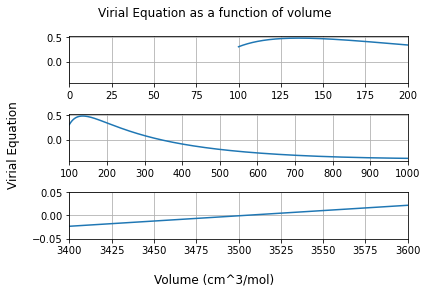

In [3]:
#Creating an arbitrary range of volumes that will contain a zero
Vxarray = np.linspace(100,5000,100000)

#Define a variable that will represent the y-axis data
y = virial(T,P,R,B,C,Vxarray)


#Plotting two different subplots for two ranges
fig, (ax1,ax2,ax3) = plt.subplots(3)
fig.suptitle("Virial Equation as a function of volume")
fig.supylabel("Virial Equation")
fig.supxlabel("Volume (cm^3/mol)")
ax1.plot(Vxarray,y)
ax1.set_xlim(0,200)
ax1.grid()
ax2.plot(Vxarray,y)
ax2.set_xlim(100,1000)
ax2.grid()
ax3.plot(Vxarray,y)
ax3.set_xlim(3400,3600)
ax3.set_ylim(-0.05,0.05)
ax3.grid()


fig.tight_layout(pad=1)

State in words where the solution(s) are.

The solutions for this function appear to be at 350 and 3500 cm^3/mol. However, there also may be a solution at or very close to 100. The model breaks down at this point as it goes to negative infinity, therefore it is not possible to know (using this method) where that exact solution lies.

### Express this in the form of a cubic polynomial in $V$

$\frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.

### The following steps display my derivation for the cubic polynomial form of the virial equation:

Multiply the equation by ${V^2}$

$(\frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0)*V^2$

$\frac{PV^3}{RT} - V^2 - BV - C = 0$

Define:

$\frac{P}{RT} = a$

$-1 = b$

The negative form of the second virial coefficient, $-B = c$

The negative form of the third virial coefficient, $-C = d$

Then the cubic polynomial form of the derived equation can be written as:

$aV^3+bV^2+cV+d = 0$


# Problem 2: Running and plotting an ODE

Most programming is repeative. Once you learn how to run an ODE solver, running it again in the future involves just editing prior code. We discussed the Lorenz equations in class, now we'll run them ourselves. The equations are as follows: 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

These equations are to describe a 2 dimensional layer of fluid that is heated from below and cooled from above. The derivation of these equations is beyond our interest here but can be found easily online. We want to focus on how to simulate such equations.

In the above, x is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between the ascending and descending currents, similar signs of x and y denoting that warm fluid is rising and cold fluid is descending. The variable z is proportional to the distortion of vertical temperature profile from linearity, a positive value indicating that the strongest gradients occur near the boundaries.

Let the parameters be
\begin{align}
\sigma =10\\
\beta =8/3\\
\rho =28\\
\end{align}

We will ignore units for this problem.

In the space below, 
1. Simulate this system with initial conditions of x = y = z = 1. Simulate out to time 1000 and take 0.1 time unit step sizes. Save the necessary results in a matrix.


In [4]:
#Import tools for ODE solving
from scipy.integrate import odeint

#General parameter setup
sigma = 10
beta = 8/3
rho = 28
t = np.linspace(0,1000,10000)
initcond = [1.0,1.0,1.0]
param = (sigma,beta,rho)

#Make a function to evaluate the ODE's

##DISCLAIMER - THIS CODE WAS PARAPHRASED FROM A CODE I FOUND ONLINE FOR A SIMILAR PROBLEM
##CREDIT: DANIEL MÜLLER-KOMOROWSKA FOR THE CONCEPTUAL STRUCTURE

def lorenz_ode(f,t,sigma,beta,rho):
    x, y, z = f
    dxdt = sigma*(y-x)
    dydt = rho*x-y-x*z
    dzdt = -beta*z+x*y
    return [dxdt,dydt,dzdt]

#Solve ODE system using toolkit

myodeans = odeint(lorenz_ode,initcond,t,param)

#print(myodeans)

2. Simulate the system again but with x = y = 1 and z = 0.9999 (precisely). Save the necessary results in a matrix.

In [5]:
#Adjusting initial conditions
initcond2 = [1.0,1.0,0.9999]

#Reusing above function with new initial conditions
myodeans2 = odeint(lorenz_ode,initcond2,t,param)

#print(myodeans2)

3. On a single plot, plot x vs y from 1 and 2 above. Be sure to label axes.

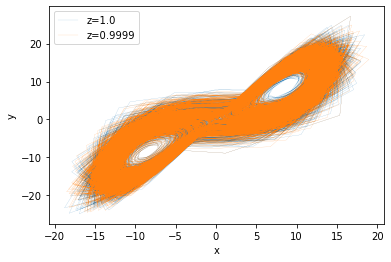

In [12]:
#Plotting x and y results on a 2D graph

plt.plot(myodeans[:, 0], myodeans[:, 1],linewidth=.1)
plt.plot(myodeans2[:, 0], myodeans2[:, 1],linewidth=.1)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(["z=1.0","z=0.9999"])

4. On a single plot, plot x vs z from 1 and 2 above. Be sure to label axes.

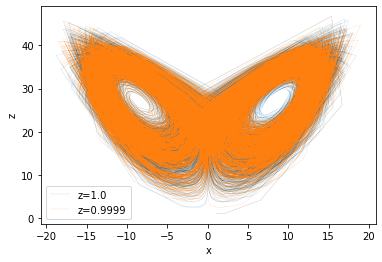

In [7]:
#Plotting x and z results on a 2D graph

plt.plot(myodeans[:, 0], myodeans[:, 2],linewidth=.1)
plt.plot(myodeans2[:, 0], myodeans2[:, 2],linewidth=.1)

plt.xlabel("x")
plt.ylabel("z")
plt.legend(["z=1.0","z=0.9999"])

5. On a single plot, plot x vs time from 1 and 2 above. Be sure to label.

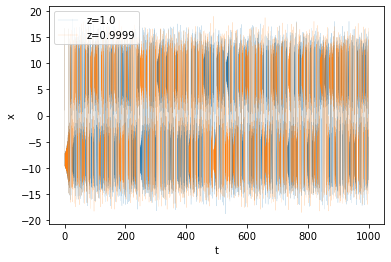

In [8]:
#Plotting t and x results on a 2D graph

plt.plot(t, myodeans[:, 0],linewidth=.1)
plt.plot(t, myodeans2[:, 0],linewidth=.1)

plt.xlabel("t")
plt.ylabel("x")
plt.legend(["z=1.0","z=0.9999"])


6. After completing all simulations, comment on how changing the initial value of z by 0.01% impacted the simulation outcomes. Be sure to use a Markdown cell for this.

**Write your answer here.**

When adjusting the value of Z by 0.01%, the simulation was changed. While it is difficult to interpret the data directly, there is a slight discrepancy that can be observed between the two data sets when they are overlapped. A seemingly minute change in the z value has thus changed the results of the model entirely.

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [16]:
from numpy import genfromtxt


#This takes the file directly from my computer downloads on the local hard drive
#Columns are in order of week, cases on avg, deaths on average
dat = genfromtxt("C:\\Users\\bcerm\\Downloads\\florida.csv",delimiter=',',skip_header=1)

#print(dat)

[[1.000000e+00 2.900000e-01 0.000000e+00]
 [2.000000e+00 2.900000e-01 0.000000e+00]
 [3.000000e+00 4.300000e-01 0.000000e+00]
 ...
 [5.390000e+02 2.331386e+04 2.122900e+02]
 [5.400000e+02 2.331386e+04 2.122900e+02]
 [5.410000e+02 2.132914e+04 2.275700e+02]]


Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2. After plotting, create a markdown cell and comment on the how these two features have evolved in time.

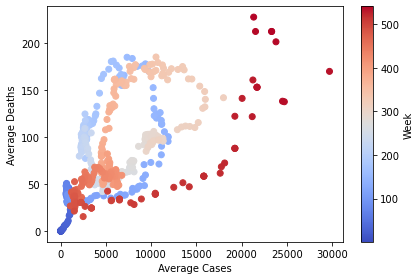

In [78]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import cm
from matplotlib import pyplot as plt, colors
import pandas as pd

# Create a continuous norm to map from data points to colors
x = dat[:,1]
y = dat[:,2]
c = dat[:,0]

plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame({"x": x, "y": y, "c": c})
fig, ax = plt.subplots()
cmap = plt.cm.coolwarm
norm = colors.Normalize(vmin=dat[:,0].min(), vmax=dat[:,0].max())
ax.scatter(df.x, df.y, color=cmap(norm(df.c.values)))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm,label='Week')
ax.set_xlabel('Average Cases')
ax.set_ylabel('Average Deaths')

plt.show()



**Put Commentary here:**

Based on the figure plotted above, the number of deaths on average has gone through cycles throughout the given dataset timeframe. The number of cases went through various stages of growth and regression. My hypothesis is that this cyclicity is related to the different strands and "waves" of COVID that were seen throughout the last two years. Early on, the data shows a quick increase of case numbers and deaths, which eventually recedes. This same trend is observed around the week 300 mark where the cases and deaths again rise together and then recede. There is a final trend of a gradual increase in cases around the week 450 mark. This trend reflects fewer deaths as cases rise, which could be an indication of increased immunity among the population. The data beyond week 500 shows more of a steep increase in cases and deaths.

One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Write a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

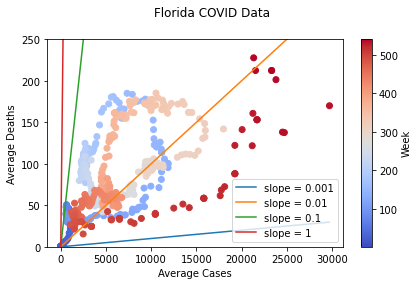

In [104]:
#For loop setup

fitx = np.linspace(0,dat[:,1].max(),100)
fit1 = np.zeros(len(fitx))
fit2 = np.zeros(len(fitx))
fit3 = np.zeros(len(fitx))
fit4 = np.zeros(len(fitx))

for i in range(len(fitx)):
    fit1[i] = 0.001*fitx[i]
    fit2[i] = 0.01*fitx[i]
    fit3[i] = 0.1*fitx[i]
    fit4[i] = fitx[i]
    
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame({"x": x, "y": y, "c": c})
fig, ax = plt.subplots()
cmap = plt.cm.coolwarm
norm = colors.Normalize(vmin=dat[:,0].min(), vmax=dat[:,0].max())
ax.scatter(df.x, df.y, color=cmap(norm(df.c.values)))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm,label='Week')
ax.set_xlabel('Average Cases')
ax.set_ylabel('Average Deaths')


#Custom fits
ax.plot(fitx,fit1)
ax.plot(fitx,fit2)
ax.plot(fitx,fit3)
ax.plot(fitx,fit4)
ax.set_ylim(0,250)
fig.suptitle("Florida COVID Data")
ax.legend(["slope = 0.001","slope = 0.01","slope = 0.1","slope = 1"],loc='lower right')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

Visually, the line of slope = 0.1 seems to "best fit" the data. In this case, best fit would mean that it is the closest representation of a linear trend that the data set shows or can be potentially correlated to.

# Problem 4 Github

- Create a github repository called "Che_Math".
- Create a read me file that explain that this repository will include code related to homeworks and projects from this course.
- Push this homework assignment to your repository.
- Enter the link you your repository here:
https://github.com/bcerminarache2410/Che_Math

**Upload your jupyter notebook to Canvas for grading. Thank you!